In [68]:
# Original dataset is too large to push to GitHub. To download the original dataset please follow the following commands:

In [1]:
!pip install kaggle


Defaulting to user installation because normal site-packages is not writeable
  Using cached kaggle-1.6.12-py3-none-any.whl


In [2]:
# chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d pavellexyr/six-months-of-gme-on-reddit

Dataset URL: https://www.kaggle.com/datasets/pavellexyr/six-months-of-gme-on-reddit
License(s): Attribution 4.0 International (CC BY 4.0)
 99%|████████████████████████████████████████▌| 172M/174M [00:01<00:00, 167MB/s]
100%|█████████████████████████████████████████| 174M/174M [00:01<00:00, 147MB/s]


In [4]:
import zipfile

zip_file_path = "six-months-of-gme-on-reddit.zip"

extract_to_directory = "datasets/"

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_directory)

# Working on the data after ypu move the files to Datasets Folder

In [5]:
import pandas as pd

In [6]:
# preprocessing the dataset for sentiment analysis

unprocesssed_df = pd.read_csv("datasets/six-months-of-gme-on-reddit-comments.csv")

In [7]:
unprocesssed_df.describe

<bound method NDFrame.describe of             type       id subreddit.id  subreddit.name  subreddit.nsfw  \
0        comment  hitrmcd       43zwn1      superstonk           False   
1        comment  hitrm85       43zwn1      superstonk           False   
2        comment  hitrghb       43zwn1      superstonk           False   
3        comment  hitrg5l        2u6vg             gme           False   
4        comment  hitre4y       36vxjo   churchofcovid           False   
...          ...      ...          ...             ...             ...   
1064850  comment  gwhjfz4       43zwn1      superstonk           False   
1064851  comment  gwhje4l       43zwn1      superstonk           False   
1064852  comment  gwhjduz        2th52  wallstreetbets           False   
1064853  comment  gwhjdr5       43zwn1      superstonk           False   
1064854  comment  gwhjcd3        2u6vg             gme           False   

         created_utc                                          permalink  \
0 

In [8]:
column_names = unprocesssed_df.columns.tolist()
print(column_names)

['type', 'id', 'subreddit.id', 'subreddit.name', 'subreddit.nsfw', 'created_utc', 'permalink', 'body', 'sentiment', 'score']


In [9]:
unprocesssed_df = unprocesssed_df[unprocesssed_df['subreddit.nsfw'] != True]

In [10]:
print(len(unprocesssed_df))

1063246


In [11]:
# correlation_matrix = unprocesssed_df.corr()
# print(correlation_matrix)

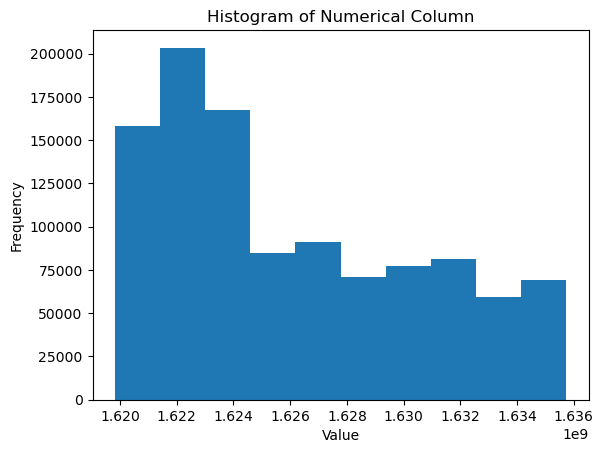

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(unprocesssed_df['created_utc'])
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Numerical Column')
plt.show()

In [13]:
print(unprocesssed_df['subreddit.name'][:10])

0        superstonk
1        superstonk
2        superstonk
3               gme
4     churchofcovid
5        superstonk
6               gme
7        superstonk
8        superstonk
9    wallstreetbets
Name: subreddit.name, dtype: object


In [14]:
print(unprocesssed_df['body'][:20])

0     u/all_hail_to_me or he’s trying to say\nMake G...
1     That also confirmed it for me. I was hesitant ...
2     What if RC intentionally chose GME as his targ...
3     Definitely retarded, but 30 million could do t...
4     Damn for a second I thought this was about the...
5              Own gme and you'll be the person hiring!
6     Maybe 4 shares. I think you've either overvalu...
7     Loopring making moves while stock market is cl...
8     This post is amazing, such a gold mine of remi...
9     Naw I'm pinging you when I triple up on GME th...
10    It gets automodded because there are certain t...
11                            Monday Gme Go Andromeda 🚀
12    Absolutely agree! \n\nMods on the previous sub...
13    And that's why brokers shut of the BUY button ...
14    As it says in Title. \n\nIf you sell your CS D...
15             Great, so buy GME, hold and DRS- gotcha!
16    Are you? Because it looks like you can’t even ...
17    I forgot about the 30 day no fees on crypt

In [15]:
unprocesssed_df = unprocesssed_df[unprocesssed_df['body'] != '[deleted]']

In [16]:
print(len(unprocesssed_df))

1063246


In [17]:
unprocesssed_df['merged_body'] = unprocesssed_df['subreddit.name'] + ':' + unprocesssed_df['score'].astype(str) + ':' + unprocesssed_df['body']

In [18]:
print(unprocesssed_df['merged_body'][:20])

0     superstonk:2:u/all_hail_to_me or he’s trying t...
1     superstonk:2:That also confirmed it for me. I ...
2     superstonk:1:What if RC intentionally chose GM...
3     gme:2:Definitely retarded, but 30 million coul...
4     churchofcovid:1:Damn for a second I thought th...
5     superstonk:28:Own gme and you'll be the person...
6     gme:3:Maybe 4 shares. I think you've either ov...
7     superstonk:8:Loopring making moves while stock...
8     superstonk:1:This post is amazing, such a gold...
9     wallstreetbets:1:Naw I'm pinging you when I tr...
10    superstonk:3:It gets automodded because there ...
11               superstonk:3:Monday Gme Go Andromeda 🚀
12    gmejungle:6:Absolutely agree! \n\nMods on the ...
13    stocks:84:And that's why brokers shut of the B...
14    superstonk:13:As it says in Title. \n\nIf you ...
15    superstonk:18:Great, so buy GME, hold and DRS-...
16    conspiracy:1:Are you? Because it looks like yo...
17    superstonk:2:I forgot about the 30 day no 

In [19]:
from datetime import datetime

In [20]:
unprocesssed_df['date'] = pd.to_datetime(unprocesssed_df['created_utc'], unit='s').dt.strftime('%Y-%m-%d')

In [21]:
column_names = unprocesssed_df.columns.tolist()
print(column_names)

['type', 'id', 'subreddit.id', 'subreddit.name', 'subreddit.nsfw', 'created_utc', 'permalink', 'body', 'sentiment', 'score', 'merged_body', 'date']


In [22]:
columns_to_drop = ['type', 'subreddit.id', 'subreddit.name', 'subreddit.nsfw', 'permalink'] 

In [23]:
unprocesssed_df.drop(columns=columns_to_drop, inplace=True)

In [24]:
print(len(unprocesssed_df))

1063246


In [25]:
column_names = unprocesssed_df.columns.tolist()
print(column_names)

['id', 'created_utc', 'body', 'sentiment', 'score', 'merged_body', 'date']


In [26]:
unprocesssed_df['sentiment_string'] = unprocesssed_df['sentiment'].apply(lambda x: 'neutral' if x == 0 else ('negative' if x < 0 else 'positive'))

In [27]:
unprocesssed_df.describe

<bound method NDFrame.describe of               id  created_utc  \
0        hitrmcd   1635724775   
1        hitrm85   1635724773   
2        hitrghb   1635724688   
3        hitrg5l   1635724684   
4        hitre4y   1635724654   
...          ...          ...   
1064850  gwhjfz4   1619827296   
1064851  gwhje4l   1619827271   
1064852  gwhjduz   1619827267   
1064853  gwhjdr5   1619827265   
1064854  gwhjcd3   1619827245   

                                                      body  sentiment  score  \
0        u/all_hail_to_me or he’s trying to say\nMake G...     0.6588      2   
1        That also confirmed it for me. I was hesitant ...     0.6249      2   
2        What if RC intentionally chose GME as his targ...     0.9315      1   
3        Definitely retarded, but 30 million could do t...    -0.4310      2   
4        Damn for a second I thought this was about the...    -0.4019      1   
...                                                    ...        ...    ...   
1064850  

In [28]:
gme_reddit_comments_5000_random = unprocesssed_df.sample(n=5000, random_state=42)

In [29]:
gme_reddit_comments_5000_random.describe

<bound method NDFrame.describe of               id  created_utc  \
676747   h12jey4   1623183348   
236615   hb0kotv   1630381109   
909475   gymg6w7   1621375110   
207233   hby0qd0   1631030298   
287810   h9hxry4   1629349240   
...          ...          ...   
870204   gz8xot8   1621839059   
1048226  gwubeym   1620083205   
5445     hiloihq   1635565216   
835827   gzkjd5j   1622068289   
940316   gy6bmgu   1621046940   

                                                      body  sentiment  score  \
676747   When you begin to divert away from AMC/GME you...     0.0000     11   
236615   Except you're not logical and wtf does the age...     0.5972      1   
909475   Yeah the margin thing also happened to me. I h...     0.5994      2   
207233     They're using crypto to suppress the gme price?     0.0000      8   
287810   I wish all GME share holders could get out of ...     0.7964      8   
...                                                    ...        ...    ...   
870204   

In [30]:
gme_reddit_comments_5000_random = gme_reddit_comments_5000_random.sort_values(by='created_utc', ascending=False)

In [31]:
gme_reddit_comments_5000_random.describe

<bound method NDFrame.describe of               id  created_utc  \
554      histght   1635708957   
609      hispz2u   1635707526   
644      hiso5qy   1635706776   
721      hiskgy5   1635705231   
813      hisfw70   1635703347   
...          ...          ...   
1063322  gwitsk9   1619858876   
1063502  gwimhyi   1619851934   
1063915  gwi9v8o   1619842086   
1064315  gwhynn0   1619835330   
1064812  gwhk9ip   1619827707   

                                                      body  sentiment  score  \
554      It isn’t just a rumor all. LRC’s GitHub code m...     0.2263      3   
609      ##DRSBOT 4.65 Reply:\n*UTC-&gt;2021-10-31  19:...     0.9884      1   
644      Buy some GME stock then you will soon have the...     0.4588      0   
721      FYI Don’t get me wrong on GME. I love and supp...     0.8415     -3   
813      Buying and holding Bitcoin, is much more power...     0.4754      0   
...                                                    ...        ...    ...   
1063322  

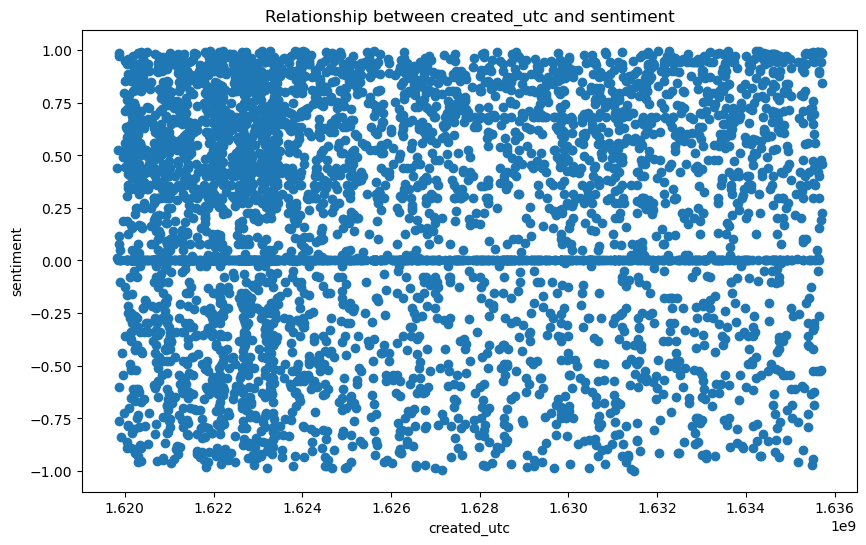

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(gme_reddit_comments_5000_random['created_utc'], gme_reddit_comments_5000_random['sentiment'])
plt.xlabel('created_utc')
plt.ylabel('sentiment')
plt.title('Relationship between created_utc and sentiment')
plt.show()

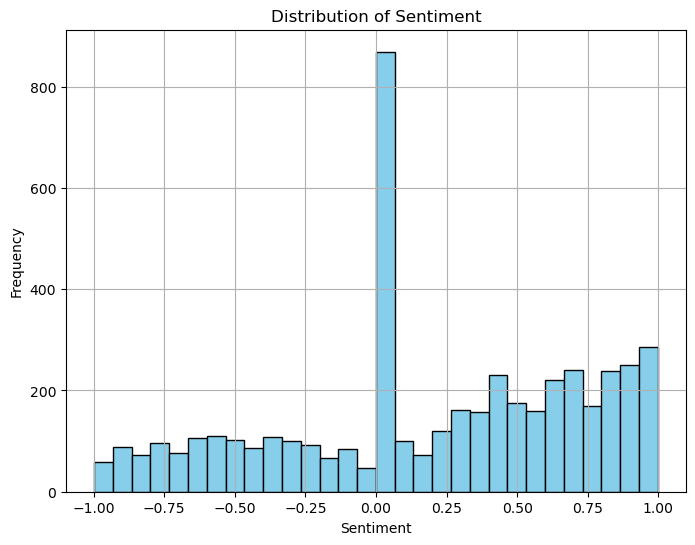

In [33]:
plt.figure(figsize=(8, 6))
plt.hist(gme_reddit_comments_5000_random['sentiment'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment')
plt.grid(True)
plt.show()

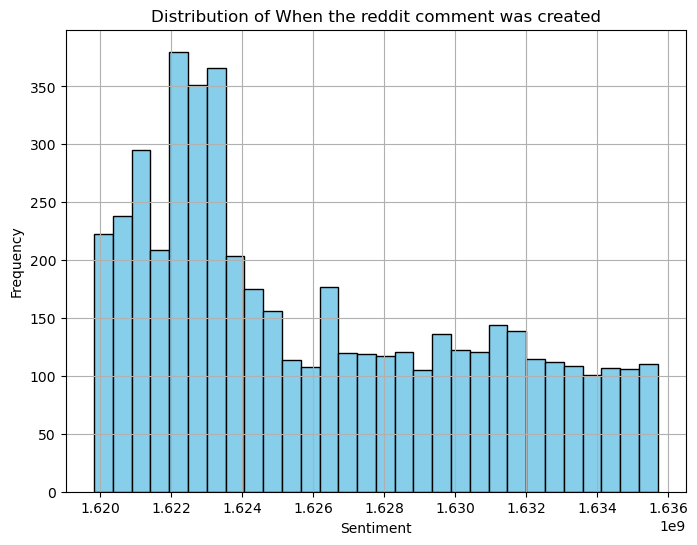

In [34]:
plt.figure(figsize=(8, 6))
plt.hist(gme_reddit_comments_5000_random['created_utc'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Distribution of When the reddit comment was created')
plt.grid(True)
plt.show()

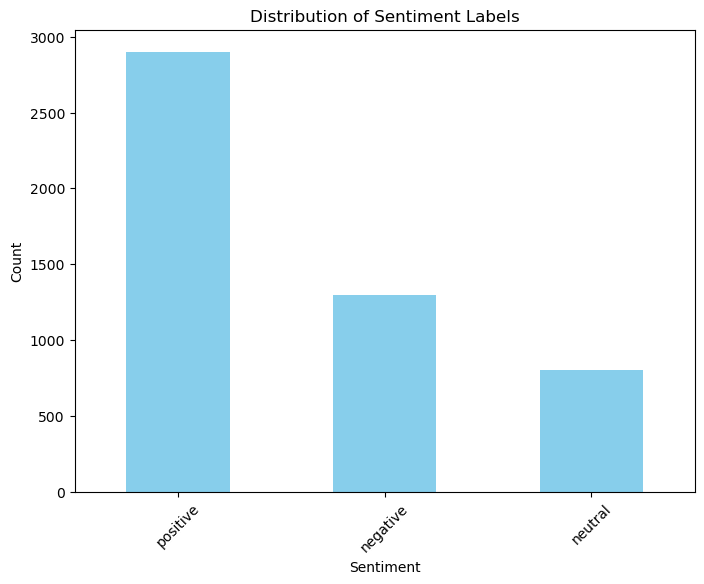

In [35]:
plt.figure(figsize=(8, 6))
gme_reddit_comments_5000_random['sentiment_string'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Labels')
plt.xticks(rotation=45)
plt.show()

In [36]:
file_path = 'datasets/5000_gme_reddit_comments_random.csv'
gme_reddit_comments_5000_random.to_csv(file_path, index=False)

In [37]:
# now working on a similar dataset with 50,000 values

In [38]:
gme_reddit_comments_50k_random = unprocesssed_df.sample(n=50000, random_state=42)

In [39]:
gme_reddit_comments_50k_random = gme_reddit_comments_50k_random.sort_values(by='created_utc', ascending=False)

In [40]:
gme_reddit_comments_50k_random.describe

<bound method NDFrame.describe of               id  created_utc  \
7        hitr7yt   1635724561   
52       hitov18   1635723339   
78       hitmoxs   1635722260   
139      hitifor   1635720130   
146      hiti1ta   1635719945   
...          ...          ...   
1064707  gwhnu85   1619829548   
1064721  gwhnh6l   1619829358   
1064770  gwhlrl9   1619828477   
1064784  gwhlaub   1619828240   
1064812  gwhk9ip   1619827707   

                                                      body  sentiment  score  \
7        Loopring making moves while stock market is cl...     0.0000      8   
52       1)Getting after hours price drop notifications...    -0.7579     11   
78       Yeah people somehow always forget about things...     0.5574      3   
139      Can you buy GME and DRS quickly with Hargreave...     0.0000      1   
146      Lol other investor groups, companies and shill...     0.2299      3   
...                                                    ...        ...    ...   
1064707  

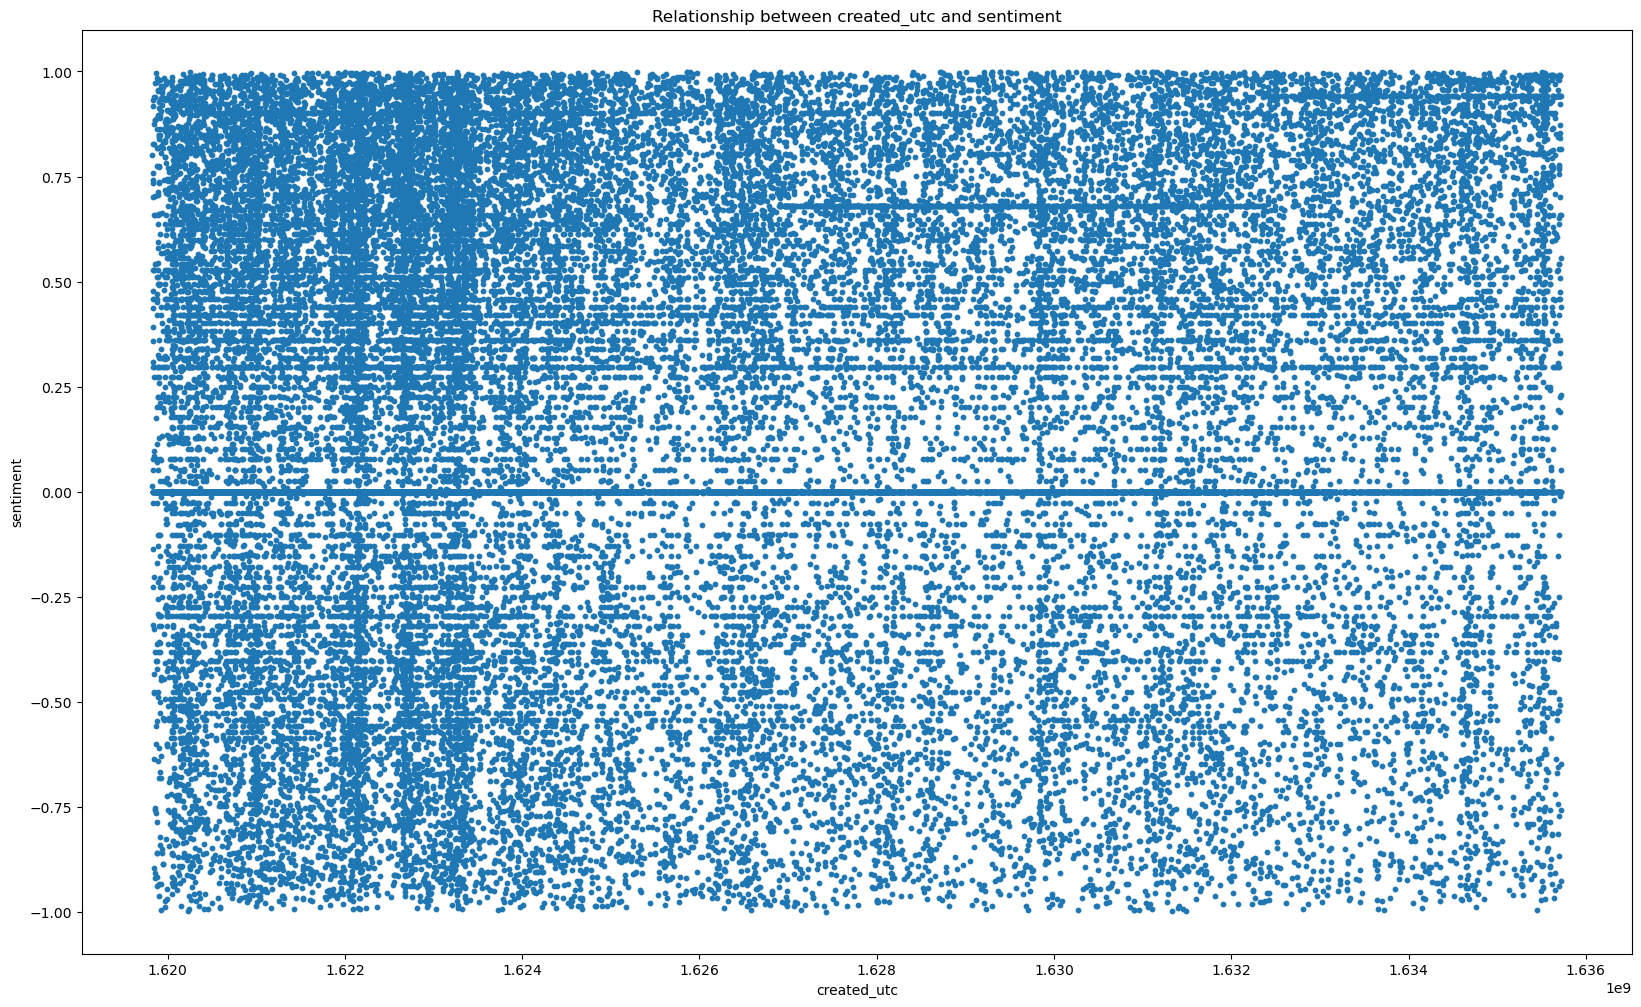

In [41]:
plt.figure(figsize=(20, 12))
plt.scatter(gme_reddit_comments_50k_random['created_utc'], gme_reddit_comments_50k_random['sentiment'], s=10)  # Adjust the size of the points here
plt.xlabel('created_utc')
plt.ylabel('sentiment')
plt.title('Relationship between created_utc and sentiment')
plt.show()

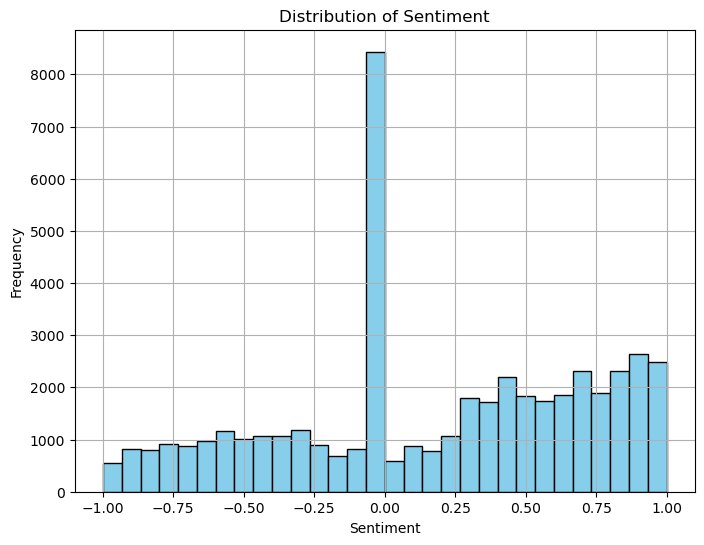

In [42]:
plt.figure(figsize=(8, 6))
plt.hist(gme_reddit_comments_50k_random['sentiment'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment')
plt.grid(True)
plt.show()

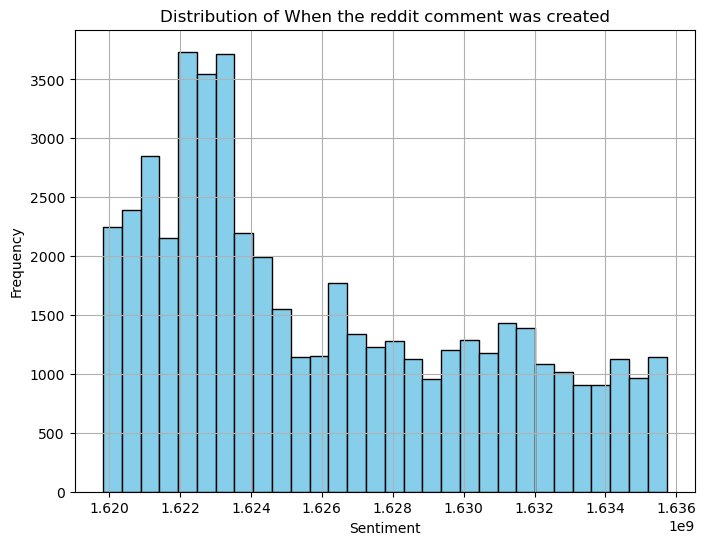

In [43]:
plt.figure(figsize=(8, 6))
plt.hist(gme_reddit_comments_50k_random['created_utc'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Distribution of When the reddit comment was created')
plt.grid(True)
plt.show()

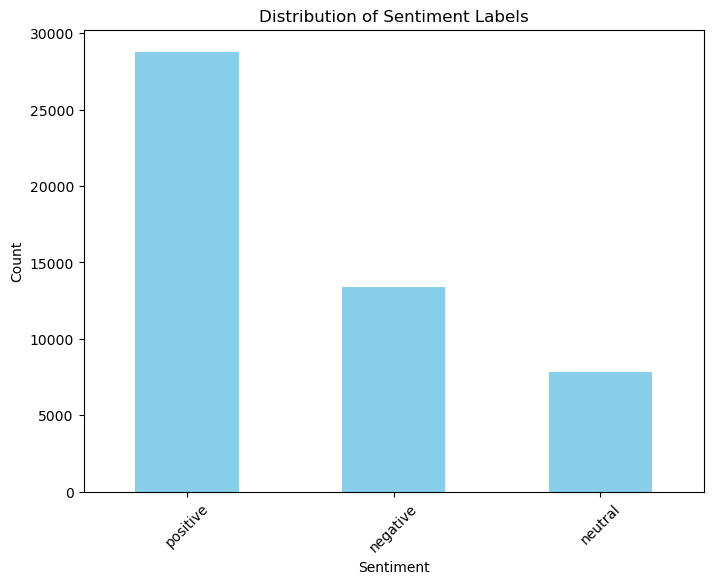

In [44]:
plt.figure(figsize=(8, 6))
gme_reddit_comments_50k_random['sentiment_string'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Labels')
plt.xticks(rotation=45)
plt.show()

In [45]:
file_path = 'datasets/50k_gme_reddit_comments_random.csv'
gme_reddit_comments_50k_random.to_csv(file_path, index=False)